# EDA

In [76]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
df = pd.read_excel('Data/plane_crash_info_cleaned.xlsx')
df.head()

,Decade,Year,Date,Location,Operator,manufacturer,Origin,Route,AC_Type,Summary,Passengers_Aboard,Crew_Aboard,Aboard_Aircraft,Passengers_Fatalities,Crew_Fatalities,Aboard_Fatalities,Ground_Fatalities,Total_Fatalites,Survivors
0,1900,1908,1908-09-17,"Fort Myer, Virginia",Military - U.S. Army,Wright,Demonstration,Demonstration,Wright Flyer III,"During a demonstration flight, a U.S. Army fly...",1.0,1.0,2.0,1.0,0.0,1.0,0,1.0,1.0
1,1900,1909,1909-09-07,"Juvisy-sur-Orge, France",Unknown,Wright,Air show,Air show,Wright Byplane,Eugene Lefebvre was the first pilot to ever be...,0.0,1.0,1.0,0.0,0.0,1.0,0,1.0,0.0
2,1910,1912,1912-07-12,"Atlantic City, New Jersey",Military - U.S. Navy,Dirigible,Test flight,Test flight,Dirigible,First U.S. dirigible Akron exploded just offsh...,0.0,5.0,5.0,0.0,5.0,5.0,0,5.0,0.0
3,1910,1913,1913-08-06,"Victoria, British Columbia, Canada",Private,Curtiss,Unknown,Unknown,Curtiss seaplane,The first fatal airplane accident in Canada oc...,0.0,1.0,1.0,0.0,1.0,1.0,0,1.0,0.0
4,1910,1913,1913-09-09,Over the North Sea,Military - German Navy,Zeppelin,Unknown,Unknown,Zeppelin L-1 (airship),The airship flew into a thunderstorm and encou...,NaN,NaN,20.0,NaN,NaN,14.0,0,14.0,6.0


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5063 entries, 0 to 5062
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Decade                 5063 non-null   int64         
 1   Year                   5063 non-null   int64         
 2   Date                   5063 non-null   datetime64[ns]
 3   Location               5063 non-null   object        
 4   Operator               5063 non-null   object        
 5   manufacturer           5048 non-null   object        
 6   Origin                 5063 non-null   object        
 7   Route                  5063 non-null   object        
 8   AC_Type                5063 non-null   object        
 9   Summary                5063 non-null   object        
 10  Passengers_Aboard      4840 non-null   float64       
 11  Crew_Aboard            4842 non-null   float64       
 12  Aboard_Aircraft        5046 non-null   float64       
 13  Pas

### percentage of missing values

In [79]:
missing_data = df.isnull().sum() / len(df) *100
missing_data.sort_values(ascending=False)

Crew_Fatalities          4.700770
Passengers_Fatalities    4.700770
Passengers_Aboard        4.404503
Crew_Aboard              4.365001
Total_Fatalites          0.888801
Survivors                0.335769
Aboard_Aircraft          0.335769
manufacturer             0.296267
Aboard_Fatalities        0.158009
Ground_Fatalities        0.000000
Decade                   0.000000
Year                     0.000000
AC_Type                  0.000000
Route                    0.000000
Origin                   0.000000
Operator                 0.000000
Location                 0.000000
Date                     0.000000
Summary                  0.000000
dtype: float64

In [80]:
df.describe()

,Decade,Year,Passengers_Aboard,Crew_Aboard,Aboard_Aircraft,Passengers_Fatalities,Crew_Fatalities,Aboard_Fatalities,Total_Fatalites,Survivors
count,5063.000000,5063.000000,4840.000000,4842.000000,5046.000000,4825.000000,4825.000000,5055.000000,5018.000000,5046.000000
mean,1966.452696,1971.069326,26.869628,4.525816,31.097107,18.914819,3.583627,22.278932,24.061977,8.792905
std,24.988699,24.772217,44.032148,3.789746,45.466616,34.139226,3.180857,35.079853,66.411876,30.543587
min,1900.000000,1908.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1950.000000,1951.000000,3.000000,2.000000,7.000000,1.000000,2.000000,4.000000,4.000000,0.000000
50%,1970.000000,1970.000000,12.000000,4.000000,16.000000,7.000000,3.000000,11.000000,12.000000,0.000000
75%,1990.000000,1992.000000,30.000000,6.000000,35.000000,21.000000,5.000000,25.000000,26.000000,4.000000
max,2020.000000,2023.000000,614.000000,83.000000,644.000000,560.000000,43.000000,583.000000,2842.000000,516.000000


### Fatalities per Year

In [100]:
df['Total_Fatalites'].sum()

120743.0

In [81]:
fatalities_by_year = df.groupby(by=['Year']).sum()
fatalities_by_year['Total_Fatalites']

Year
1908      1.0
1909      1.0
1912      5.0
1913     43.0
1915     36.0
        ...  
2019    326.0
2020    338.0
2021    189.0
2022    191.0
2023      0.0
Name: Total_Fatalites, Length: 113, dtype: float64

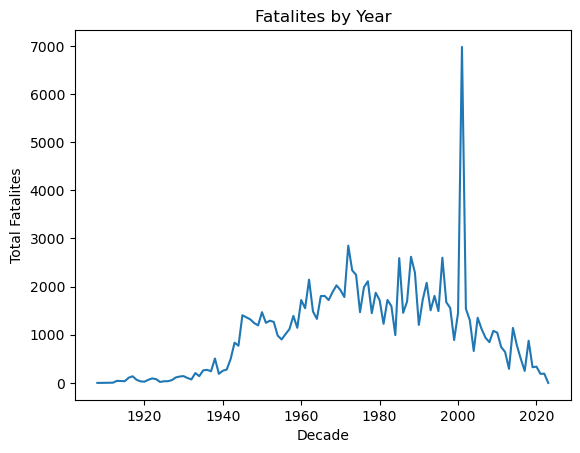

In [82]:
sns.lineplot(x=fatalities_by_year.index, y='Total_Fatalites', data=fatalities_by_year)
plt.xlabel('Decade')
plt.ylabel('Total Fatalites')
plt.title('Fatalites by Year')
plt.show()

### 2001 had the highest fatalities due to 09/11

### Aciddents per year

In [83]:
accidents_by_year = df.groupby(by=['Year']).count()
accidents_by_year['Date']

Year
1908     1
1909     1
1912     1
1913     3
1915     2
        ..
2019    13
2020     8
2021     9
2022     6
2023     1
Name: Date, Length: 113, dtype: int64

### Accidents per decade

In [84]:
df['Decade'] = df['Date'].dt.year.floordiv(10) * 10
Fatalies_by_decade = df.groupby(by=['Decade']).count()
Fatalies_by_decade['Total_Fatalites']

Decade
1900      2
1910     31
1920    182
1930    350
1940    573
1950    639
1960    649
1970    611
1980    572
1990    633
2000    518
2010    236
2020     22
Name: Total_Fatalites, dtype: int64

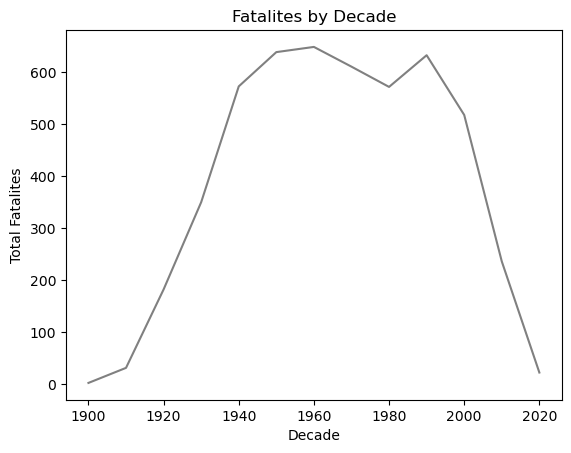

In [85]:
sns.lineplot(x=Fatalies_by_decade.index, y='Total_Fatalites', data=Fatalies_by_decade, color="grey")
plt.xlabel('Decade')
plt.ylabel('Total Fatalites')
plt.title('Fatalites by Decade')
plt.show()


### Ac_Type involved in more accidents

In [86]:
AC_Type_c = df.groupby("AC_Type").size().reset_index(name='AC_Type_c')
AC_Type_c = AC_Type_c.sort_values(by='AC_Type_c', ascending=False)
AC_Type_top = AC_Type_c.head(10)
AC_Type_top

,AC_Type,AC_Type_c
1152,Douglas DC-3,333
2430,de Havilland Canada DHC-6 Twin Otter 300,84
1064,Douglas C-47A,71
1053,Douglas C-47,64
1204,Douglas DC-4,41
2379,Yakovlev YAK-40,35
166,Antonov AN-26,34
1609,Junkers JU-52/3m,30
1221,Douglas DC-6B,27
1089,Douglas C-47B,27


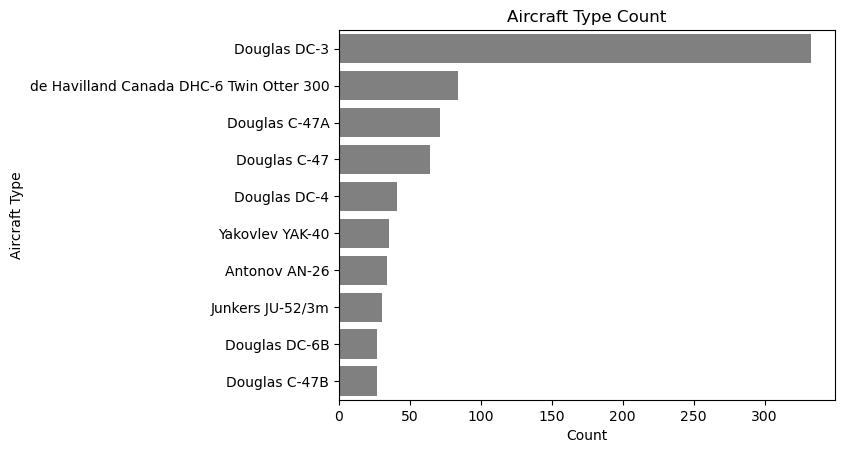

In [87]:
sns.barplot(x='AC_Type_c', y='AC_Type', data=AC_Type_top, orient='h', color='grey')
plt.ylabel('Aircraft Type')
plt.xlabel('Count')
plt.title('Aircraft Type Count')
plt.show()

In [88]:
AC_man_c = df.groupby("manufacturer").size().reset_index(name='manufacturer_c')
AC_man_c = AC_man_c.sort_values(by='manufacturer_c', ascending=False)
AC_man_c = AC_man_c.head(10)
AC_man_c

,manufacturer,manufacturer_c
113,Douglas,994
57,Boeing,414
193,Lockheed,325
30,Antonov,289
317,de Havilland Canada,253
168,Ilyushin,141
135,Fokker,140
204,McDonnell,127
96,Curtiss,119
294,Tupolev,103


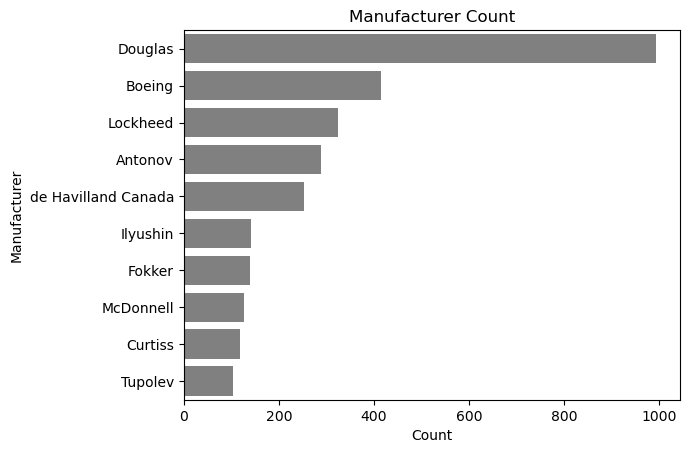

In [89]:
sns.barplot(x='manufacturer_c', y='manufacturer', data=AC_man_c, orient='h', color='grey')
plt.ylabel('Manufacturer')
plt.xlabel('Count')
plt.title('Manufacturer Count')
plt.show()

### Operator involved in more accidents

In [90]:
operator_c = df.groupby("Operator").size().reset_index(name='operator_c')
operator_c = operator_c.sort_values(by='operator_c', ascending=False)
operator_c = operator_c.head(10)
operator_c

,Operator,operator_c
94,Aeroflot,256
1420,Military - U.S. Air Force,142
204,Air France,74
739,Deutsche Lufthansa,63
2167,United Air Lines,44
1430,Military - U.S. Army Air Forces,43
645,China National Aviation Corporation,43
1615,Pan American World Airways,42
370,American Airlines,38
990,Indian Airlines,35


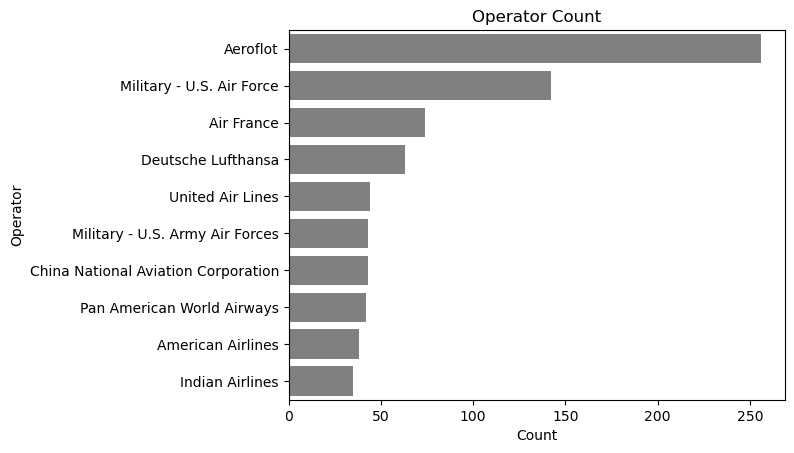

In [91]:
sns.barplot(x='operator_c', y='Operator', data=operator_c, orient='h', color='grey')
plt.ylabel('Operator')
plt.xlabel('Count')
plt.title('Operator Count')
plt.show()

### Types of Routes With More Accidents

In [107]:
df1 = df[~df.Origin.isin(['Unknown', 'Training'])]
Origin_c = df1.groupby("Origin").size().reset_index(name='Origin_c')
Origin_c = Origin_c.sort_values(by='Origin_c', ascending=False)
Origin_c = Origin_c.head(10)
Origin_c

,Origin,Origin_c
1522,Paris,45
1158,London,45
1350,Moscow,38
1415,New York City,37
1697,Rome,31
1845,Sightseeing,31
321,Bogota,31
480,Chicago,30
1297,Miami,27
1797,Sao Paulo,26


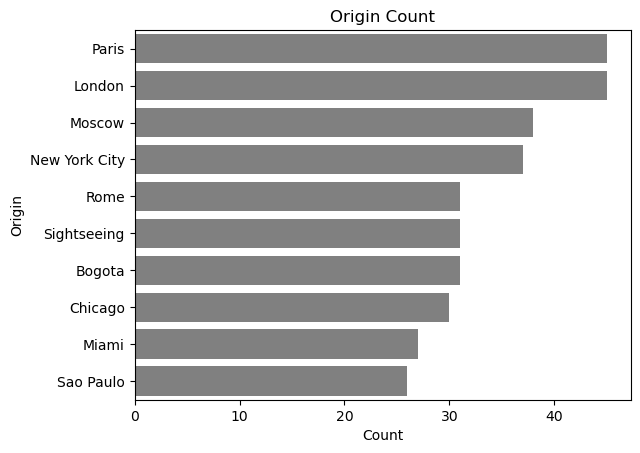

In [108]:
sns.barplot(x='Origin_c', y='Origin', data=Origin_c, orient='h', color='grey')
plt.ylabel('Origin')
plt.xlabel('Count')
plt.title('Origin Count')
plt.show()

# Insights so far:
-  120743 Total Fatalies in 5063 Accidents
-  From the 1980 Decade, the tendency of Fatalities has been decreasing, however due to the 09/11 attacks, there was a huge spike
-  "Douglas DC-3" is by far the Airplane involved in more accidents totalizing 333, second we have the "de Havilland Canada DHC-6 Twin Otter 300" with 84
-  As for maneufactures "Douglas" airplanes were involved in 994 and "Boeing"'s 414
-  When it comes to operators, "Aeroflot" had 256 accidents and "U.S. Air Force" 142
-  For the Accidents where routes are known, 45 of the accidents were origination from Paris and other 45 from London
